In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.pipeline import make_pipeline


In [2]:
road = 1
direction = "in"
df = pd.read_csv(
    f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv", parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 2 or row == 1 else 0)
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-02-01 00:00:34,1,19,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1,1
1,2020-02-01 00:00:34,1,26,in,1,0,0,1,71,71,0,0,0.000000,0.000000,0.8875,0,0
2,2020-02-01 00:00:34,1,28,in,3,1,1,2,41,48,0,0,0.021739,0.022727,0.5125,2,1
3,2020-02-01 00:00:34,1,29,in,3,3,3,0,75,108,0,0,0.065217,0.068182,0.9375,0,0
4,2020-02-01 00:00:34,1,30,in,5,5,3,0,32,56,62,66,0.108696,0.068182,0.4000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694507,2020-02-29 23:59:14,1,939,in,1,0,0,1,20,20,0,0,0.000000,0.000000,0.2500,2,1
22694508,2020-02-29 23:59:14,1,941,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1,1
22694509,2020-02-29 23:59:14,1,959,in,1,1,0,0,47,47,60,60,0.021739,0.000000,0.5875,4,0
22694510,2020-02-29 23:59:14,1,960,in,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,1,1


In [3]:
df.max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          1
km                                 993
direction                           in
all_units                          109
inflow_units                        46
outflow_unit                        44
samecell_units                      84
avg_speed                           80
max_speed                          240
avg_traveltime                     998
max_traveltime                     999
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
cluster                              4
label                                1
dtype: object

In [4]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

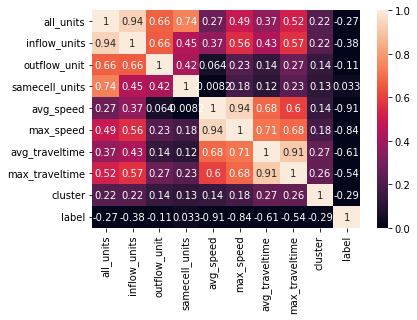

In [5]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [6]:
num_cols = ['all_units', 'inflow_units',
            'avg_speed', 'max_speed',
            'avg_traveltime',"max_traveltime"]
num_cols

['all_units',
 'inflow_units',
 'avg_speed',
 'max_speed',
 'avg_traveltime',
 'max_traveltime']

In [7]:
X=df[num_cols]
y=df['cluster']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = tree.predict(x_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98   1946079
           1       1.00      1.00      1.00   2165092
           2       0.98      0.98      0.98    745093
           3       0.74      0.71      0.72    524214
           4       0.95      0.96      0.96   2108711

    accuracy                           0.96   7489189
   macro avg       0.93      0.93      0.93   7489189
weighted avg       0.96      0.96      0.96   7489189



In [12]:
print(accuracy_score(y_test, y_pred))

0.9620828103016228


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

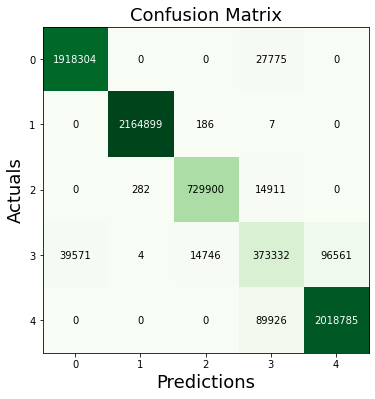

In [14]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
# import joblib
# joblib.dump(tree, f"DecisionTreeModelRoad{road}{direction}.joblib")
